In [1]:
import os
os.chdir('C:/Users/Shreyansh Upadhyay/Desktop/Courses/K-Means-and-Knn-master')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('creditcard.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
    data.columns
x = data[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y = data['Class']

{'whiskers': [<matplotlib.lines.Line2D at 0x288d35c6518>,
 'caps': [<matplotlib.lines.Line2D at 0x288d35c6ba8>,
 'boxes': [<matplotlib.lines.Line2D at 0x288d35c6128>],
 'medians': [<matplotlib.lines.Line2D at 0x288d35c6fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x288d35d95c0>],
 'means': []}

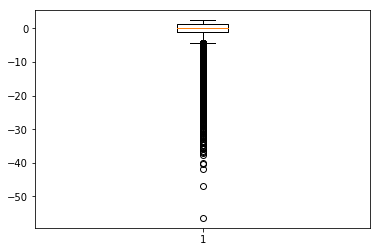

In [9]:
plt.boxplot(data['V1'])

{'whiskers': [<matplotlib.lines.Line2D at 0x288d364abe0>,
 'caps': [<matplotlib.lines.Line2D at 0x288d36572b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x288d364a7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x288d3657940>],
 'fliers': [<matplotlib.lines.Line2D at 0x288d3657c88>],
 'means': []}

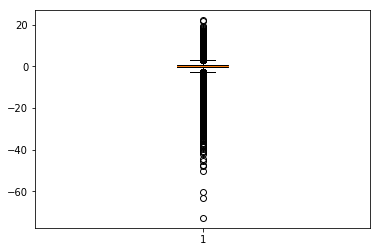

In [10]:
plt.boxplot(data['V2'])

{'whiskers': [<matplotlib.lines.Line2D at 0x288d36a5c50>,
 'caps': [<matplotlib.lines.Line2D at 0x288d36b3320>,
 'boxes': [<matplotlib.lines.Line2D at 0x288d36a5860>],
 'medians': [<matplotlib.lines.Line2D at 0x288d36b39b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x288d36b3cf8>],
 'means': []}

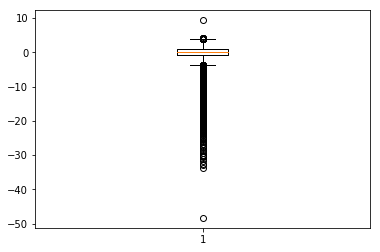

In [11]:
plt.boxplot(data['V3'])

{'whiskers': [<matplotlib.lines.Line2D at 0x288d3708a58>,
 'caps': [<matplotlib.lines.Line2D at 0x288d3708e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x288d3708668>],
 'medians': [<matplotlib.lines.Line2D at 0x288d37147b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x288d3714b00>],
 'means': []}

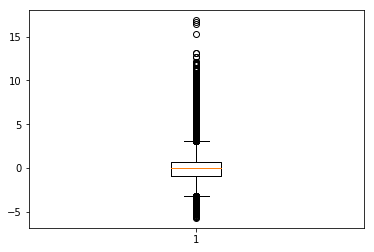

In [12]:
plt.boxplot(data['V4'])

{'whiskers': [<matplotlib.lines.Line2D at 0x288d3760da0>,
 'caps': [<matplotlib.lines.Line2D at 0x288d376a470>,
 'boxes': [<matplotlib.lines.Line2D at 0x288d37609b0>],
 'medians': [<matplotlib.lines.Line2D at 0x288d376ab00>],
 'fliers': [<matplotlib.lines.Line2D at 0x288d376ae48>],
 'means': []}

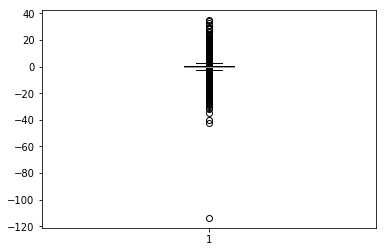

In [13]:
plt.boxplot(data['V5'])

{'whiskers': [<matplotlib.lines.Line2D at 0x288d37bdf98>,
 'caps': [<matplotlib.lines.Line2D at 0x288d37c8940>,
 'boxes': [<matplotlib.lines.Line2D at 0x288d37bde80>],
 'medians': [<matplotlib.lines.Line2D at 0x288d37c8fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x288d37d2358>],
 'means': []}

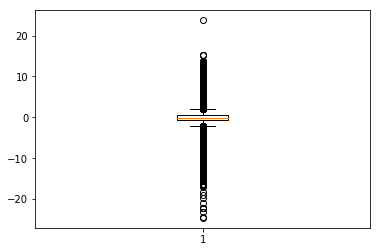

In [14]:
plt.boxplot(data['V10'])

{'whiskers': [<matplotlib.lines.Line2D at 0x288d3819550>,
 'caps': [<matplotlib.lines.Line2D at 0x288d3819be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x288d3819160>],
 'medians': [<matplotlib.lines.Line2D at 0x288d38232b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x288d38235f8>],
 'means': []}

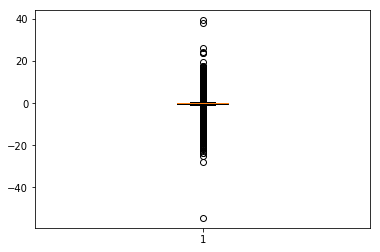

In [15]:
plt.boxplot(data['V20'])

{'whiskers': [<matplotlib.lines.Line2D at 0x288d386d860>,
 'caps': [<matplotlib.lines.Line2D at 0x288d386def0>,
 'boxes': [<matplotlib.lines.Line2D at 0x288d386d470>],
 'medians': [<matplotlib.lines.Line2D at 0x288d38765c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x288d3876908>],
 'means': []}

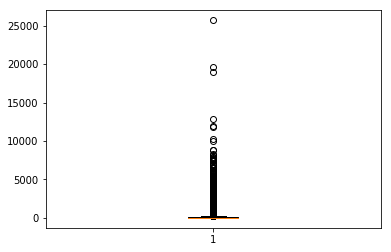

In [16]:
plt.boxplot(data['Amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x288d38c0f60>,
 'caps': [<matplotlib.lines.Line2D at 0x288d38c9630>,
 'boxes': [<matplotlib.lines.Line2D at 0x288d38c0b70>],
 'medians': [<matplotlib.lines.Line2D at 0x288d38c9cc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x288d38c9c88>],
 'means': []}

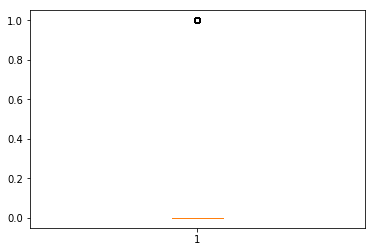

In [17]:
plt.boxplot(data['Class'])

In [18]:
import sklearn
from sklearn.preprocessing import StandardScaler,scale,normalize
x=data[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y=data['Class']

In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)
model = LogisticRegression()
model.fit(xtrain,ytrain)

C:\Users\Shreyansh Upadhyay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
pred = model.predict(xtest)
confusion_matrix(ytest,pred)

array([[85281,    15],
       [   61,    86]], dtype=int64)

In [21]:
precision_score(ytest,pred)

0.8514851485148515

In [22]:
accuracy_score(ytest,pred)

0.9991105181231933

In [23]:
recall_score(ytest,pred)

0.5850340136054422

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error

In [25]:
mean_absolute_error(ytest,pred)

0.00088948187680676

In [26]:
mean_squared_error(ytest,pred)

0.00088948187680676

In [27]:
mean_squared_log_error(ytest,pred)

0.00042735424853742617

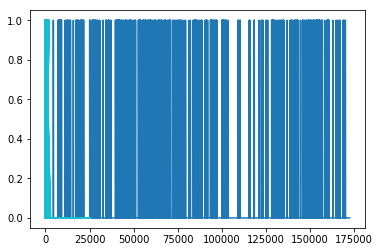

In [28]:
plt.plot(x,y)

# Logistic Regression with another dataset

In [1]:
import os
os.chdir('C:/Users/Shreyansh Upadhyay/Desktop/Courses/Logistic Regression')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data1=pd.read_csv('candy-data.csv')

In [3]:
data1.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [4]:
data1.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

In [6]:
data1.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [7]:
x = data1[['fruity','caramel','peanutyalmondy',
         'nougat','crispedricewafer','hard','bar','pluribus']]
y = data1['chocolate']

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
model = LogisticRegression()
model.fit(xtrain,ytrain)

C:\Users\Shreyansh Upadhyay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
pred = model.predict(xtest)
confusion_matrix(ytest,pred)

array([[9, 1],
       [2, 5]], dtype=int64)

In [10]:
precision_score(ytest,pred)

0.8333333333333334

In [11]:
accuracy_score(ytest,pred)

0.8235294117647058

In [12]:
recall_score(ytest,pred)

0.7142857142857143

In [13]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error

In [14]:
mean_absolute_error(ytest,pred)

0.17647058823529413

In [15]:
mean_squared_error(ytest,pred)

0.17647058823529413

In [16]:
mean_squared_log_error(ytest,pred)

0.08478582598556494

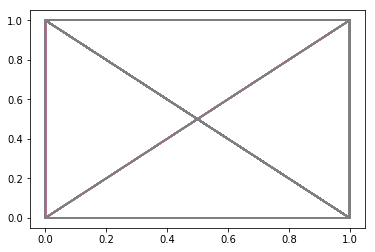

In [17]:
plt.plot(x,y)